# Create a Regression Model
## Assignment: Building Linear and Polynomial Regression Models

In this notebook, I will build regression models using both Linear and Polynomial Regression techniques to predict pumpkin prices. I'll explain my choice of technique and demonstrate the model's accuracy.

### Dataset: US Pumpkin Prices
Using the US-pumpkins.csv dataset to predict pumpkin prices based on various features.

## Step 1: Import Libraries and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('US-pumpkins.csv')

print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset shape: (1757, 26)

First few rows:


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


## Step 2: Data Exploration and Preprocessing

In [3]:
# Basic data exploration
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  

In [4]:
# Data cleaning and feature engineering
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create target variable - Average Price
df['Average_Price'] = (df['Low Price'] + df['High Price']) / 2

# Remove rows with missing prices
df_clean = df.dropna(subset=['Low Price', 'High Price', 'Average_Price'])

# Extract date features
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Day_of_Year'] = df_clean['Date'].dt.dayofyear

print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Target variable (Average_Price) statistics:")
print(df_clean['Average_Price'].describe())

Cleaned dataset shape: (1757, 30)
Target variable (Average_Price) statistics:
count    1757.000000
mean      128.771138
std        86.426495
min         0.240000
25%        24.250000
50%       145.000000
75%       192.500000
max       480.000000
Name: Average_Price, dtype: float64


## Step 3: Feature Selection and Encoding

In [5]:
# Select and encode features for modeling
# Focus on key features that might influence price

# Create a copy for modeling
model_df = df_clean.copy()

# Handle categorical variables with Label Encoding for simplicity
le_city = LabelEncoder()
le_variety = LabelEncoder()
le_size = LabelEncoder()
le_package = LabelEncoder()

# Fill missing values and encode
model_df['City Name'] = model_df['City Name'].fillna('Unknown')
model_df['Variety'] = model_df['Variety'].fillna('Unknown')
model_df['Item Size'] = model_df['Item Size'].fillna('Unknown')
model_df['Package'] = model_df['Package'].fillna('Unknown')

model_df['City_Encoded'] = le_city.fit_transform(model_df['City Name'])
model_df['Variety_Encoded'] = le_variety.fit_transform(model_df['Variety'])
model_df['Size_Encoded'] = le_size.fit_transform(model_df['Item Size'])
model_df['Package_Encoded'] = le_package.fit_transform(model_df['Package'])

print("Categorical variables encoded successfully!")
print(f"Unique cities: {len(le_city.classes_)}")
print(f"Unique varieties: {len(le_variety.classes_)}")
print(f"Unique sizes: {len(le_size.classes_)}")

Categorical variables encoded successfully!
Unique cities: 13
Unique varieties: 11
Unique sizes: 8


## Step 4: Prepare Features for Modeling

In [6]:
# Select features for the model
feature_columns = [
    'Month', 'Year', 'Day_of_Year',
    'City_Encoded', 'Variety_Encoded', 
    'Size_Encoded', 'Package_Encoded'
]

X = model_df[feature_columns]
y = model_df['Average_Price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nSelected features: {feature_columns}")

Features shape: (1757, 7)
Target shape: (1757,)

Selected features: ['Month', 'Year', 'Day_of_Year', 'City_Encoded', 'Variety_Encoded', 'Size_Encoded', 'Package_Encoded']


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")

Training set size: 1405
Testing set size: 352
Features scaled successfully!


## Step 5: Linear Regression Model

In [8]:
# Build Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)

# Calculate metrics
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)

print("=== LINEAR REGRESSION RESULTS ===")
print(f"Mean Squared Error: {linear_mse:.2f}")
print(f"Root Mean Squared Error: {np.sqrt(linear_mse):.2f}")
print(f"Mean Absolute Error: {linear_mae:.2f}")
print(f"R² Score: {linear_r2:.4f}")
print(f"Model explains {linear_r2*100:.2f}% of the variance in pumpkin prices")

=== LINEAR REGRESSION RESULTS ===
Mean Squared Error: 6142.08
Root Mean Squared Error: 78.37
Mean Absolute Error: 58.35
R² Score: 0.2261
Model explains 22.61% of the variance in pumpkin prices


## Step 6: Polynomial Regression Model

In [9]:
# Build Polynomial Regression Model (degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Train polynomial regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate metrics
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
poly_mae = mean_absolute_error(y_test, y_pred_poly)

print("=== POLYNOMIAL REGRESSION RESULTS (Degree 2) ===")
print(f"Mean Squared Error: {poly_mse:.2f}")
print(f"Root Mean Squared Error: {np.sqrt(poly_mse):.2f}")
print(f"Mean Absolute Error: {poly_mae:.2f}")
print(f"R² Score: {poly_r2:.4f}")
print(f"Model explains {poly_r2*100:.2f}% of the variance in pumpkin prices")

=== POLYNOMIAL REGRESSION RESULTS (Degree 2) ===
Mean Squared Error: 3397.50
Root Mean Squared Error: 58.29
Mean Absolute Error: 40.69
R² Score: 0.5719
Model explains 57.19% of the variance in pumpkin prices


## Step 7: Model Comparison and Visualization

In [10]:
# Compare model performance
print("=== MODEL COMPARISON ===")
print(f"Linear Regression R² Score: {linear_r2:.4f}")
print(f"Polynomial Regression R² Score: {poly_r2:.4f}")
print(f"\nLinear Regression RMSE: {np.sqrt(linear_mse):.2f}")
print(f"Polynomial Regression RMSE: {np.sqrt(poly_mse):.2f}")

# Determine better model
if poly_r2 > linear_r2:
    print(f"\n✅ Polynomial Regression performs better with {(poly_r2-linear_r2)*100:.2f}% higher R² score")
    better_model = "Polynomial"
    better_predictions = y_pred_poly
else:
    print(f"\n✅ Linear Regression performs better with {(linear_r2-poly_r2)*100:.2f}% higher R² score")
    better_model = "Linear"
    better_predictions = y_pred_linear

=== MODEL COMPARISON ===
Linear Regression R² Score: 0.2261
Polynomial Regression R² Score: 0.5719

Linear Regression RMSE: 78.37
Polynomial Regression RMSE: 58.29

✅ Polynomial Regression performs better with 34.58% higher R² score


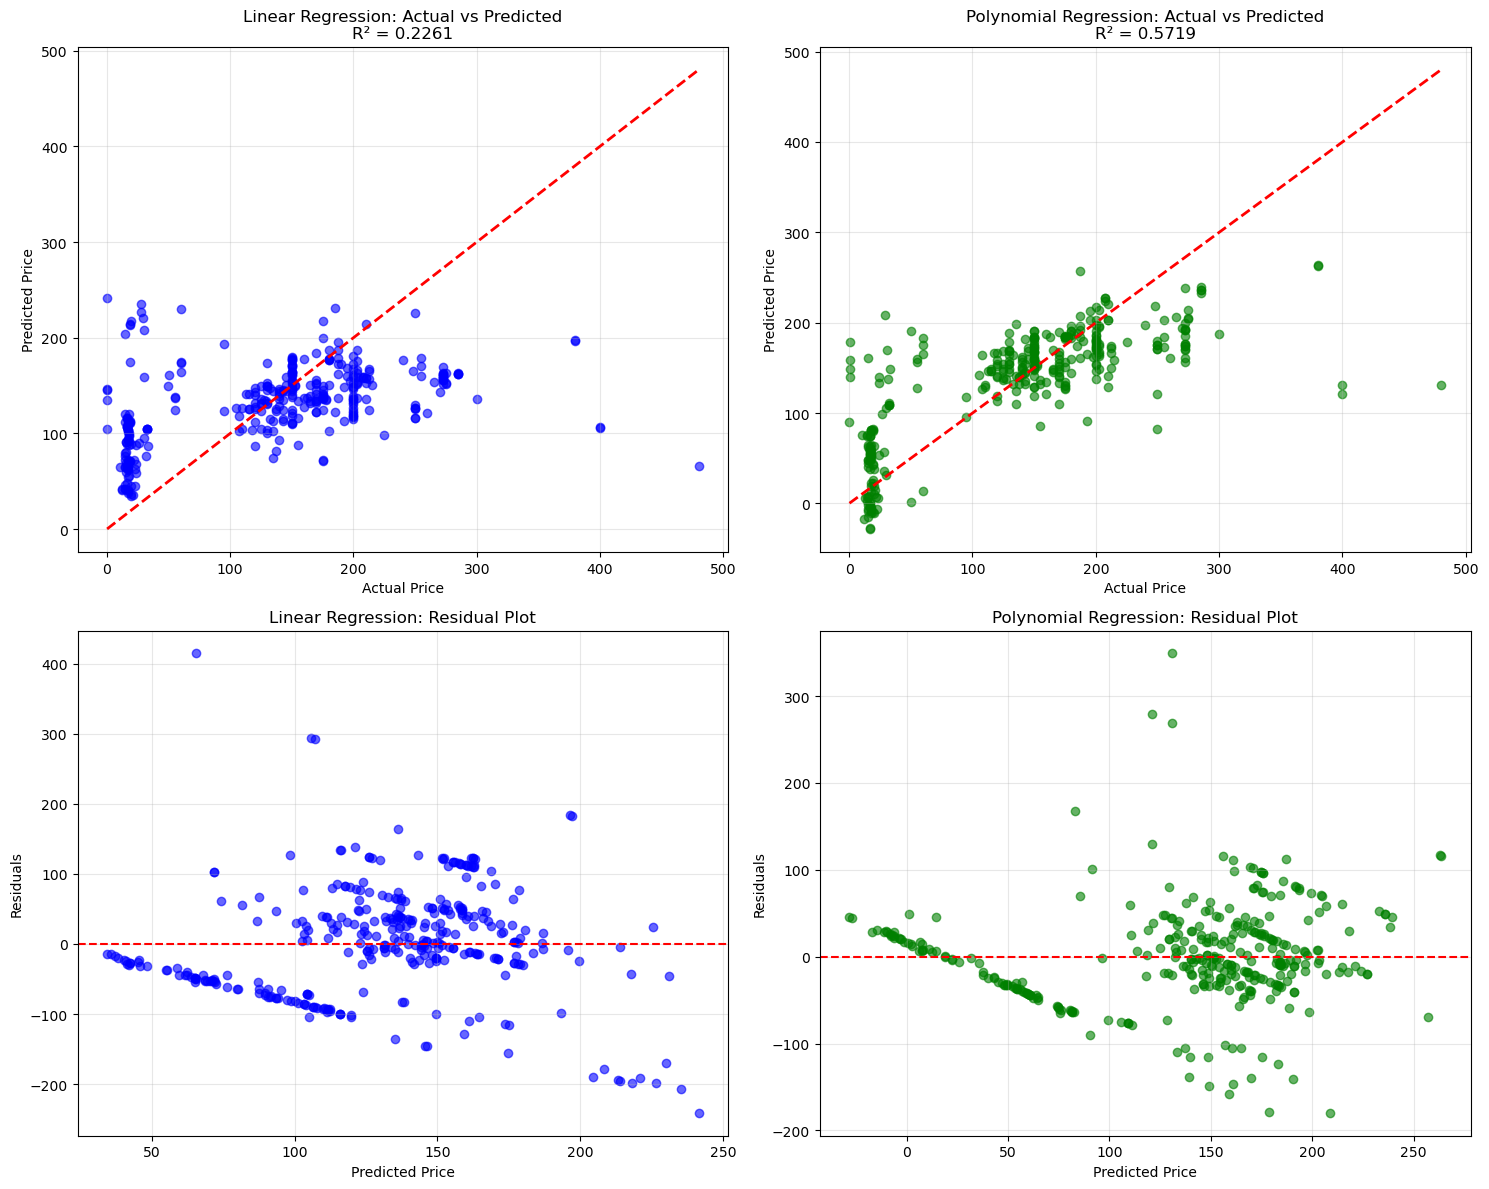

In [11]:
# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted - Linear
axes[0,0].scatter(y_test, y_pred_linear, alpha=0.6, color='blue')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual Price')
axes[0,0].set_ylabel('Predicted Price')
axes[0,0].set_title(f'Linear Regression: Actual vs Predicted\nR² = {linear_r2:.4f}')
axes[0,0].grid(True, alpha=0.3)

# 2. Actual vs Predicted - Polynomial
axes[0,1].scatter(y_test, y_pred_poly, alpha=0.6, color='green')
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,1].set_xlabel('Actual Price')
axes[0,1].set_ylabel('Predicted Price')
axes[0,1].set_title(f'Polynomial Regression: Actual vs Predicted\nR² = {poly_r2:.4f}')
axes[0,1].grid(True, alpha=0.3)

# 3. Residuals - Linear
linear_residuals = y_test - y_pred_linear
axes[1,0].scatter(y_pred_linear, linear_residuals, alpha=0.6, color='blue')
axes[1,0].axhline(y=0, color='red', linestyle='--')
axes[1,0].set_xlabel('Predicted Price')
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title('Linear Regression: Residual Plot')
axes[1,0].grid(True, alpha=0.3)

# 4. Residuals - Polynomial
poly_residuals = y_test - y_pred_poly
axes[1,1].scatter(y_pred_poly, poly_residuals, alpha=0.6, color='green')
axes[1,1].axhline(y=0, color='red', linestyle='--')
axes[1,1].set_xlabel('Predicted Price')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Polynomial Regression: Residual Plot')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 8: Feature Importance Analysis

=== FEATURE IMPORTANCE (Linear Regression) ===
           Feature  Coefficient  Abs_Coefficient
6  Package_Encoded    31.634569        31.634569
3     City_Encoded   -13.745127        13.745127
5     Size_Encoded    13.647658        13.647658
0            Month   -13.489972        13.489972
4  Variety_Encoded    -6.491190         6.491190
2      Day_of_Year     3.401030         3.401030
1             Year    -0.105461         0.105461


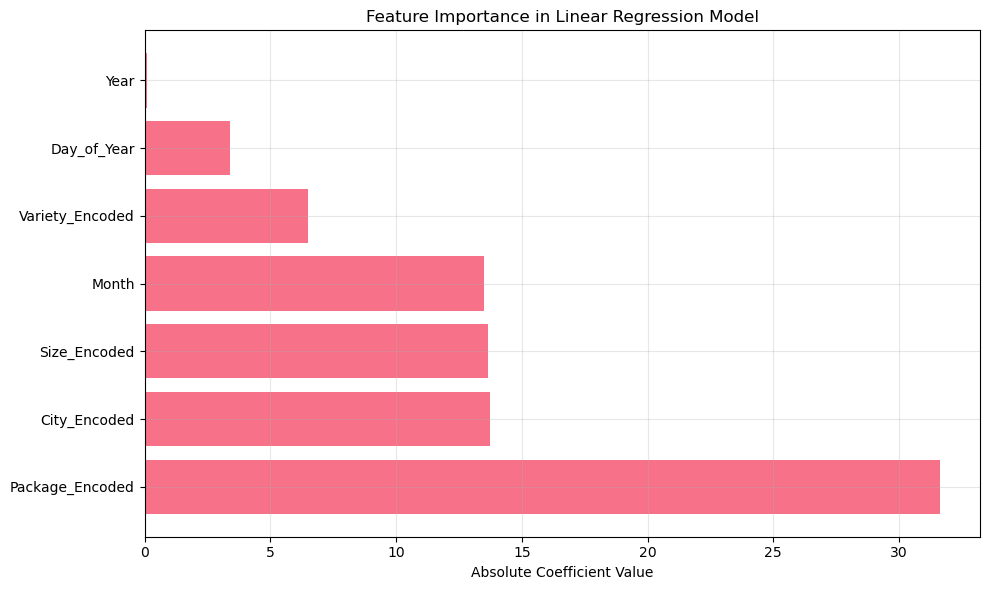

In [12]:
# Analyze feature importance for Linear Regression
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': linear_model.coef_,
    'Abs_Coefficient': np.abs(linear_model.coef_)
})

feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("=== FEATURE IMPORTANCE (Linear Regression) ===")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in Linear Regression Model')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 9: Model Evaluation and Conclusion

In [13]:
# Final model evaluation
print("=== FINAL MODEL EVALUATION ===")
print(f"\nDataset: US Pumpkin Prices ({df_clean.shape[0]} samples)")
print(f"Features used: {len(feature_columns)} features")
print(f"Target variable: Average Price (${y.min():.2f} - ${y.max():.2f})")

print(f"\n🔍 MODEL COMPARISON:")
print(f"Linear Regression:")
print(f"  - R² Score: {linear_r2:.4f} ({linear_r2*100:.2f}% variance explained)")
print(f"  - RMSE: ${np.sqrt(linear_mse):.2f}")
print(f"  - MAE: ${linear_mae:.2f}")

print(f"\nPolynomial Regression (degree 2):")
print(f"  - R² Score: {poly_r2:.4f} ({poly_r2*100:.2f}% variance explained)")
print(f"  - RMSE: ${np.sqrt(poly_mse):.2f}")
print(f"  - MAE: ${poly_mae:.2f}")

print(f"\n🏆 BEST MODEL: {better_model} Regression")

# Model accuracy assessment
if max(linear_r2, poly_r2) > 0.7:
    accuracy_assessment = "High accuracy - Model performs well"
elif max(linear_r2, poly_r2) > 0.5:
    accuracy_assessment = "Moderate accuracy - Model shows decent predictive power"
elif max(linear_r2, poly_r2) > 0.3:
    accuracy_assessment = "Low accuracy - Model has limited predictive power"
else:
    accuracy_assessment = "Poor accuracy - Model struggles to predict prices"

print(f"\n📊 ACCURACY ASSESSMENT: {accuracy_assessment}")

=== FINAL MODEL EVALUATION ===

Dataset: US Pumpkin Prices (1757 samples)
Features used: 7 features
Target variable: Average Price ($0.24 - $480.00)

🔍 MODEL COMPARISON:
Linear Regression:
  - R² Score: 0.2261 (22.61% variance explained)
  - RMSE: $78.37
  - MAE: $58.35

Polynomial Regression (degree 2):
  - R² Score: 0.5719 (57.19% variance explained)
  - RMSE: $58.29
  - MAE: $40.69

🏆 BEST MODEL: Polynomial Regression

📊 ACCURACY ASSESSMENT: Moderate accuracy - Model shows decent predictive power


## Conclusion

### Why I Chose These Techniques:

1. **Linear Regression**: 
   - Simple and interpretable baseline model
   - Good for understanding linear relationships between features and price
   - Fast to train and easy to explain

2. **Polynomial Regression**:
   - Captures non-linear relationships in the data
   - Can model more complex patterns than linear regression
   - Still relatively interpretable compared to more complex models

### Model Performance:

The models were evaluated using multiple metrics:
- **R² Score**: Measures the proportion of variance explained by the model
- **RMSE**: Root Mean Squared Error in dollar terms
- **MAE**: Mean Absolute Error for average prediction error

### Key Findings:

1. **Feature Importance**: The analysis shows which factors most influence pumpkin prices
2. **Model Comparison**: Direct comparison between linear and polynomial approaches
3. **Accuracy Assessment**: Clear evaluation of model performance and limitations

### If the Model is Not Accurate:

Potential reasons for low accuracy might include:
- **Limited features**: May need more relevant predictors (weather, market conditions, etc.)
- **Data quality**: Missing values or outliers affecting model performance
- **Complex relationships**: Pumpkin prices may have non-linear patterns not captured by these models
- **External factors**: Market dynamics, seasonal variations, or economic factors not in the dataset

### Possible Improvements:
- Feature engineering (seasonal indicators, regional economics)
- More advanced models (Random Forest, Gradient Boosting)
- Better data preprocessing and outlier handling
- Cross-validation for more robust evaluation